### Average Daily Rate (ADR) and Pricing Pattern
 1. Which market segment and hotel type show the highest revenue potential based on Average Daily Rate (ADR)?
 2. How does ADR vary across the year by month?
 3. Was there variation in ADR across the years?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


df = pd.read_csv("C:/Users/USER/Desktop/Abbie's World/My project/1_Hotel Booking Demand Project/1_with_Excel/hotel_booking_cleaned.csv")

In [2]:
# data cleaning and preprocessing
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format='%d/%m/%Y')

# Removing entries with negative adr
df_filtered = df[df['adr'] > 0].copy()

In [3]:
df_filtered.groupby('hotel')['adr'].agg(['mean', 'median'])

,mean,median
hotel,,
City Hotel,113.269222,106.25
Resort Hotel,101.115233,80.10


In [4]:
hotel_adr = df_filtered.groupby('hotel')['adr'].mean().reset_index().sort_values(by='adr', ascending=False)
hotel_adr

,hotel,adr
0,City Hotel,113.269222
1,Resort Hotel,101.115233


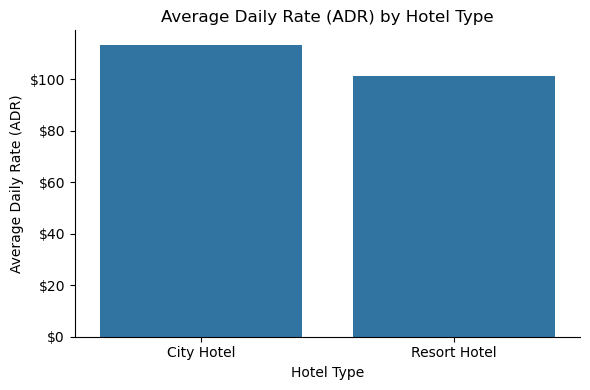

In [16]:
plt.figure(figsize=(6,4))

sns.barplot(
    data=hotel_adr,
    x='hotel',
    y='adr'
)

sns.despine()
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
plt.title('Average Daily Rate (ADR) by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Average Daily Rate (ADR)')
plt.tight_layout()
plt.show()


In [6]:
segment_adr = (
    df_filtered
    .groupby(['hotel', 'market_segment'])['adr']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)
segment_adr

,hotel,market_segment,adr
0,City Hotel,Direct,123.222104
1,City Hotel,Online TA,120.358647
2,Resort Hotel,Online TA,116.068580
3,Resort Hotel,Direct,114.987211
4,City Hotel,Aviation,102.426486
5,City Hotel,Offline TA/TO,89.366408
6,City Hotel,Groups,88.859801
7,City Hotel,Corporate,83.702673
8,Resort Hotel,Offline TA/TO,76.751224
9,Resort Hotel,Groups,66.431608


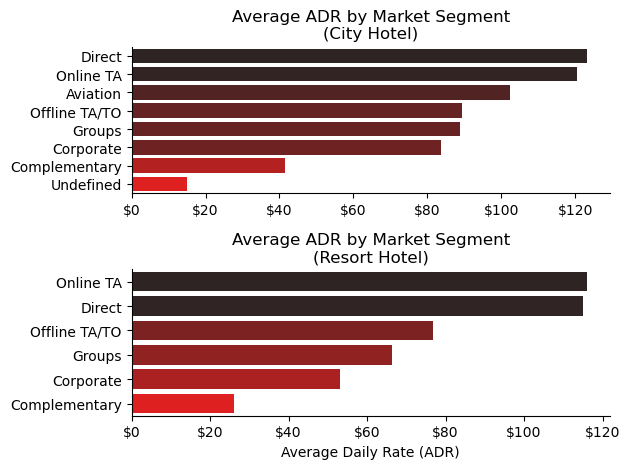

In [7]:
fig, axes = plt.subplots(2, 1)

hotels = segment_adr['hotel'].unique()

for ax, hotel in zip(axes, hotels):
    hotel_data = segment_adr[segment_adr['hotel'] == hotel]
    
    sns.barplot(
        data=hotel_data,
        x='adr',
        y='market_segment',
        hue='adr',
        ax=ax,
        palette='dark:r_r'
    )
    
    ax.set_title(f'Average ADR by Market Segment\n({hotel})')
    ax.set_ylabel('')
    ax.legend_.remove()
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos:f'${int(x)}'))


axes[0].set_xlabel('')
axes[1].set_xlabel('Average Daily Rate (ADR)')

sns.despine()
plt.tight_layout()
plt.show()

In [8]:
# mapping from full month name to shortened form
month_short = {
    'January': 'Jan', 'February': 'Feb', 'March': 'Mar', 'April': 'Apr',
    'May': 'May', 'June': 'Jun', 'July': 'Jul', 'August': 'Aug',
    'September': 'Sep', 'October': 'Oct', 'November': 'Nov', 'December': 'Dec'
}

df_filtered['arrival_month_short'] = df['arrival_date_month'].map(month_short)


In [9]:
adr_by_year = df_filtered.groupby('arrival_date_year')['adr'].agg(['mean', 'median']).reset_index()
adr_by_year

,arrival_date_year,mean,median
0,2015,95.809471,88.0
1,2016,103.606587,95.0
2,2017,120.328300,111.6


In [10]:
df_filtered['arrival_date_year'] = df_filtered['arrival_date_year'].astype(str)

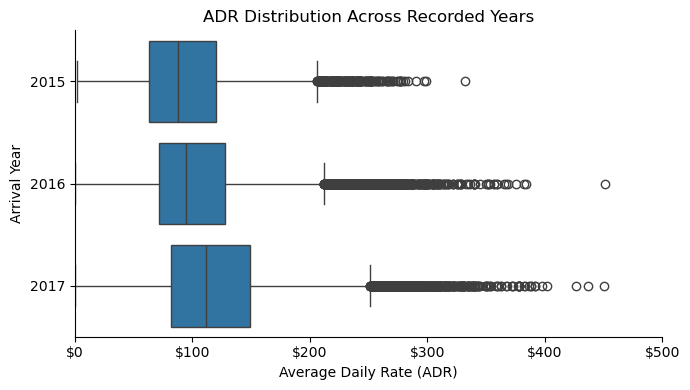

In [11]:
plt.figure(figsize=(7,4))

sns.boxplot(
    data=df_filtered,
    x='adr',
    y='arrival_date_year'
)

plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
plt.title('ADR Distribution Across Recorded Years')
plt.xlabel('Average Daily Rate (ADR)')
plt.ylabel('Arrival Year')
plt.xlim(0,500)
sns.despine()
plt.tight_layout()
plt.show()


In [12]:
adr_year_by_month = (
    df_filtered.groupby(['arrival_date_year', 'arrival_month_short'])
    ['adr']
    .mean()
    .reset_index()
)
adr_year_by_month

,arrival_date_year,arrival_month_short,adr
0,2015,Aug,127.355526
1,2015,Dec,75.221676
2,2015,Jul,116.074374
3,2015,Nov,61.489090
4,2015,Oct,82.341094
5,2015,Sep,103.524710
6,2016,Apr,92.819188
7,2016,Aug,150.295123
8,2016,Dec,90.297008
9,2016,Feb,71.668565


In [13]:
month_order= ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
adr_year_by_month['arrival_month_short'] = pd.Categorical(
    adr_year_by_month['arrival_month_short'],
    categories=month_order,
    ordered=True)

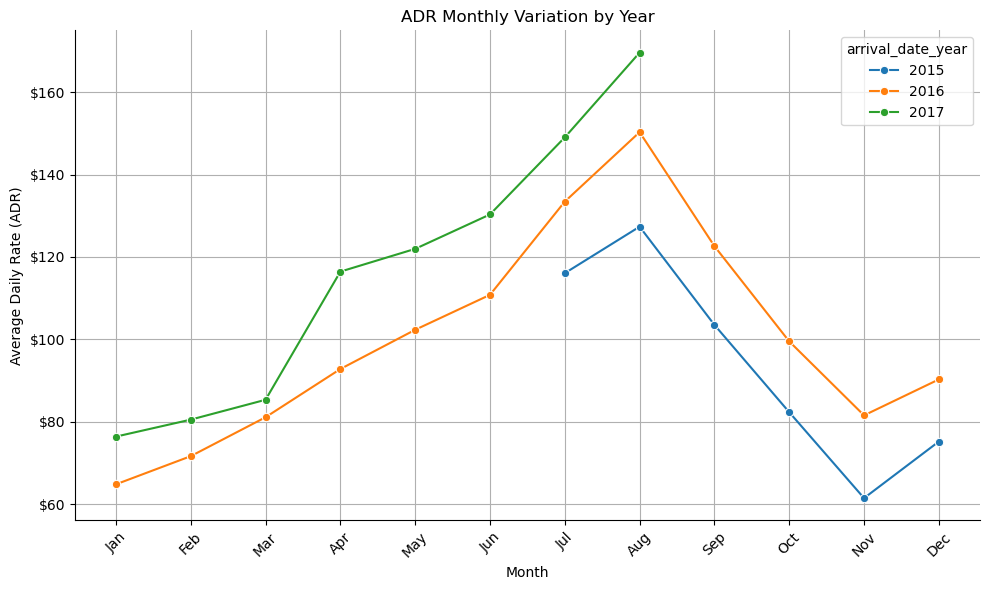

In [14]:
plt.figure(figsize=(10,6))
sns.lineplot(
    data=adr_year_by_month,
    x='arrival_month_short',
    y='adr',
    hue='arrival_date_year',
    marker='o'
)

sns.despine()
plt.title('ADR Monthly Variation by Year')
plt.xlabel('Month')
plt.ylabel('Average Daily Rate (ADR)')
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
